#### Import modules

In [1]:
import tensorflow.keras
from matplotlib import pyplot as plt
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

#### Check if you are in the virtual environment

In [2]:
!which jupyter

/home/snay/anaconda3/envs/deep_learning/bin/jupyter


#### Import data

In [3]:
from tensorflow.keras.datasets import mnist

Train-Test-Split data

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Plot first 50 datapoints

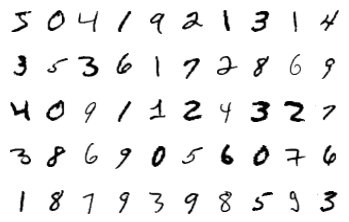

In [5]:
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.Greys)
    plt.axis('off')

Take a look at the shape

In [6]:
X_train.shape

(60000, 28, 28)

Take a look at the data for the first datapoint

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

To be able to process the data, the information for each datapoint has to be reshaped into a single row

In [8]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [9]:
X_train_reshaped = pd.DataFrame(X_train.reshape(60000, 784))
X_test_reshaped = pd.DataFrame(X_test.reshape(10000, 784))

In [10]:
X_train_reshaped.shape, X_test_reshaped.shape

((60000, 784), (10000, 784))

In [11]:
X_train_reshaped.iloc[0].shape

(784,)

For the output, ten hot-encoded categories are needed

In [12]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [13]:
y_train_reshaped = to_categorical(y_train, num_classes=10)
y_test_reshaped = to_categorical(y_test, num_classes=10)

In [14]:
y_train_reshaped.shape, y_test_reshaped.shape

((60000, 10), (10000, 10))

In [15]:
y_train_reshaped[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Instantiate the model

In [16]:
model = Sequential([
    Dense(1000, input_shape=(784,)),
    Dropout(0.2),
    Activation('relu'),
        BatchNormalization(),
    Dense(100),
    Dropout(0.5),
    Activation('relu'),
        BatchNormalization(),
    Dense(10),
    Activation('softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              785000    
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
activation (Activation)      (None, 1000)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1000)              4000      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               100100    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0

In [18]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(X_train_reshaped, y_train_reshaped, epochs=50, batch_size=500, verbose=1, validation_data=(X_test_reshaped, y_test_reshaped), validation_split=0.1)

Epoch 1/50
108/108 [==============================] - 2s 18ms/step - loss: 0.3640 - accuracy: 0.8998 - val_loss: 0.1074 - val_accuracy: 0.9695
Epoch 2/50
108/108 [==============================] - 2s 15ms/step - loss: 0.1424 - accuracy: 0.9619 - val_loss: 0.0807 - val_accuracy: 0.9772
Epoch 3/50
108/108 [==============================] - 2s 16ms/step - loss: 0.0967 - accuracy: 0.9732 - val_loss: 0.0678 - val_accuracy: 0.9788
Epoch 4/50
108/108 [==============================] - 2s 17ms/step - loss: 0.0702 - accuracy: 0.9799 - val_loss: 0.0641 - val_accuracy: 0.9815
Epoch 5/50
108/108 [==============================] - 2s 17ms/step - loss: 0.0582 - accuracy: 0.9832 - val_loss: 0.0597 - val_accuracy: 0.9825
Epoch 6/50
108/108 [==============================] - 2s 16ms/step - loss: 0.0485 - accuracy: 0.9864 - val_loss: 0.0601 - val_accuracy: 0.9835
Epoch 7/50
108/108 [==============================] - 2s 17ms/step - loss: 0.0387 - accuracy: 0.9886 - val_loss: 0.0637 - val_accuracy: 0.9837

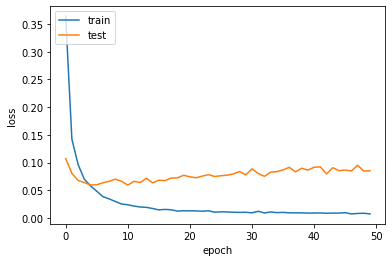

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

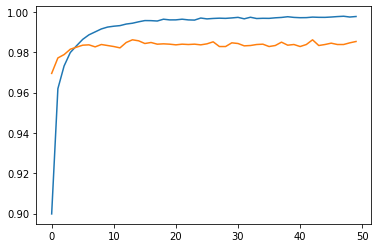

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])